In [27]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [28]:
# Função para ler e processar arquivos .dat
def processar_dados(arquivo, diretorio='../output_multi/native/alternatives'):
    filepath = f'{diretorio}/{arquivo}'
    if not os.path.exists(filepath):
        print(f"Aviso: Arquivo {filepath} não encontrado")
        return None, None, None, None
    
    df = pd.read_csv(filepath, sep=',', engine='python')
    matSize = df['matSize'].astype(int)
    gflops = df['Size'].astype(float)
    tempo_medio = df['Mean'].astype(float)
    tempo_max = df['Largest'].astype(float)
    tempo_min = df['Smallest'].astype(float)
    
    # Desempenho = GFLOPS / Tempo (GFLOPS/s)
    desempenho_medio = gflops / tempo_medio
    desempenho_min = gflops / tempo_max
    desempenho_max = gflops / tempo_min
    
    return matSize, desempenho_medio, desempenho_min, desempenho_max

## Análise - Native Alternatives

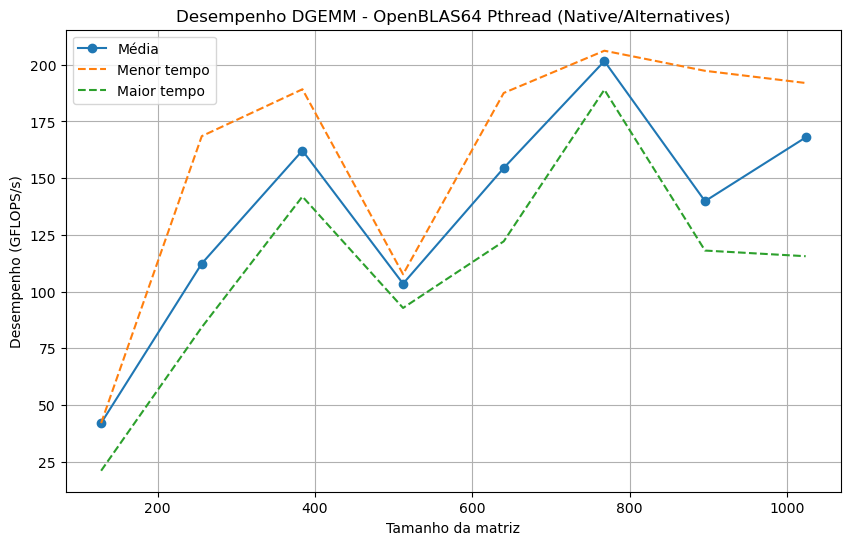

In [29]:
# OpenBLAS64 Pthread
matSize_oblas64pth, desemp_oblas64pth, desemp_oblas64pth_min, desemp_oblas64pth_max = processar_dados(
    'output_OpenBLAS64Pth.dat', '../output_multi/native/alternatives')

if matSize_oblas64pth is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64pth, desemp_oblas64pth, label='Média', marker='o')
    plt.plot(matSize_oblas64pth, desemp_oblas64pth_min, '--', label='Menor tempo')
    plt.plot(matSize_oblas64pth, desemp_oblas64pth_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - OpenBLAS64 Pthread (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

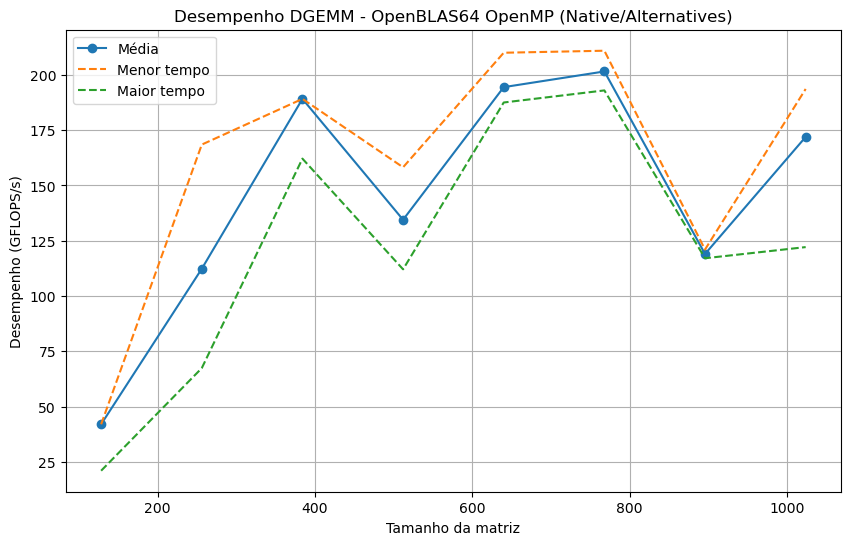

In [30]:
# OpenBLAS64 OpenMP
matSize_oblas64omp, desemp_oblas64omp, desemp_oblas64omp_min, desemp_oblas64omp_max = processar_dados(
    'output_OpenBLAS64Omp.dat', '../output_multi/native/alternatives')

if matSize_oblas64omp is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64omp, desemp_oblas64omp, label='Média', marker='o')
    plt.plot(matSize_oblas64omp, desemp_oblas64omp_min, '--', label='Menor tempo')
    plt.plot(matSize_oblas64omp, desemp_oblas64omp_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - OpenBLAS64 OpenMP (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

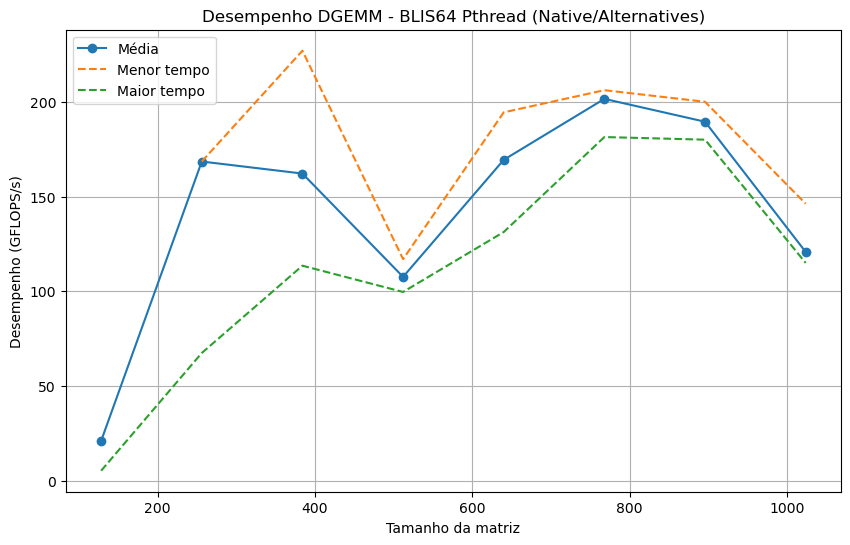

In [31]:
# BLIS64 Pthread
matSize_blis64pth, desemp_blis64pth, desemp_blis64pth_min, desemp_blis64pth_max = processar_dados(
    'output_BLIS64Pth.dat', '../output_multi/native/alternatives')

if matSize_blis64pth is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64pth, desemp_blis64pth, label='Média', marker='o')
    plt.plot(matSize_blis64pth, desemp_blis64pth_min, '--', label='Menor tempo')
    plt.plot(matSize_blis64pth, desemp_blis64pth_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - BLIS64 Pthread (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

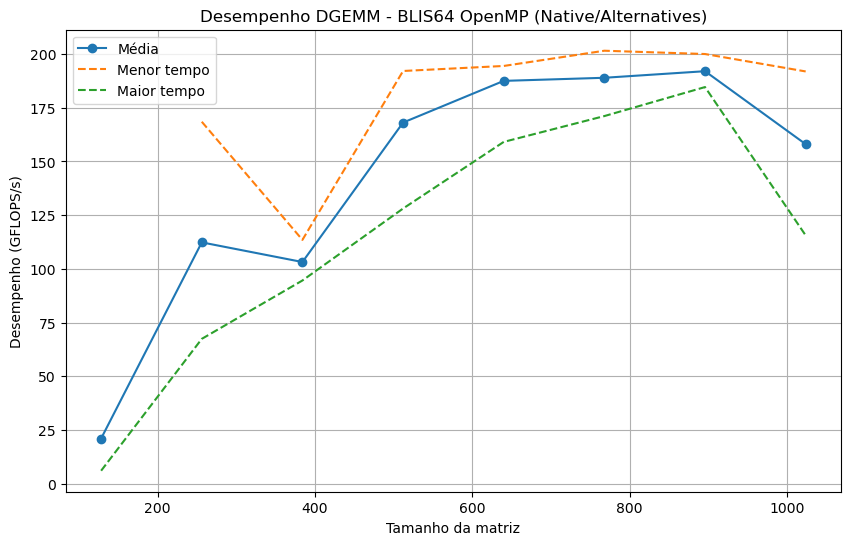

In [32]:
# BLIS64 OpenMP
matSize_blis64omp, desemp_blis64omp, desemp_blis64omp_min, desemp_blis64omp_max = processar_dados(
    'output_BLIS64Omp.dat', '../output_multi/native/alternatives')

if matSize_blis64omp is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64omp, desemp_blis64omp, label='Média', marker='o')
    plt.plot(matSize_blis64omp, desemp_blis64omp_min, '--', label='Menor tempo')
    plt.plot(matSize_blis64omp, desemp_blis64omp_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - BLIS64 OpenMP (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

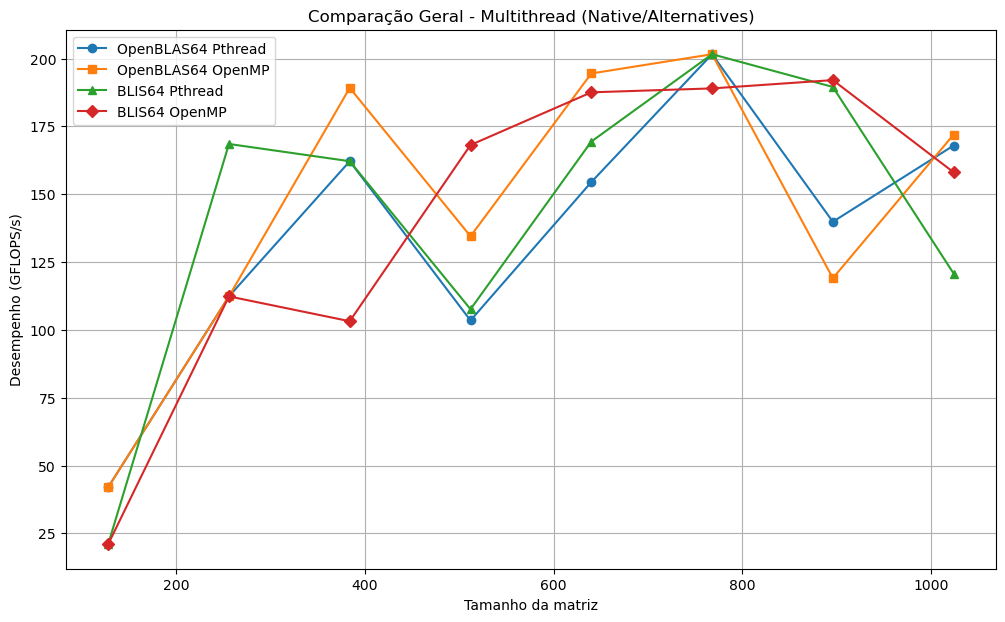

In [33]:
# Comparação Geral - Native Alternatives
plt.figure(figsize=(12,7))
if matSize_oblas64pth is not None:
    plt.plot(matSize_oblas64pth, desemp_oblas64pth, '-', label='OpenBLAS64 Pthread', marker='o')
if matSize_oblas64omp is not None:
    plt.plot(matSize_oblas64omp, desemp_oblas64omp, '-', label='OpenBLAS64 OpenMP', marker='s')
if matSize_blis64pth is not None:
    plt.plot(matSize_blis64pth, desemp_blis64pth, '-', label='BLIS64 Pthread', marker='^')
if matSize_blis64omp is not None:
    plt.plot(matSize_blis64omp, desemp_blis64omp, '-', label='BLIS64 OpenMP', marker='D')
plt.xlabel('Tamanho da matriz')
plt.ylabel('Desempenho (GFLOPS/s)')
plt.title('Comparação Geral - Multithread (Native/Alternatives)')
plt.legend()
plt.grid(True)
plt.show()

## Análise - Native Direct Compilation

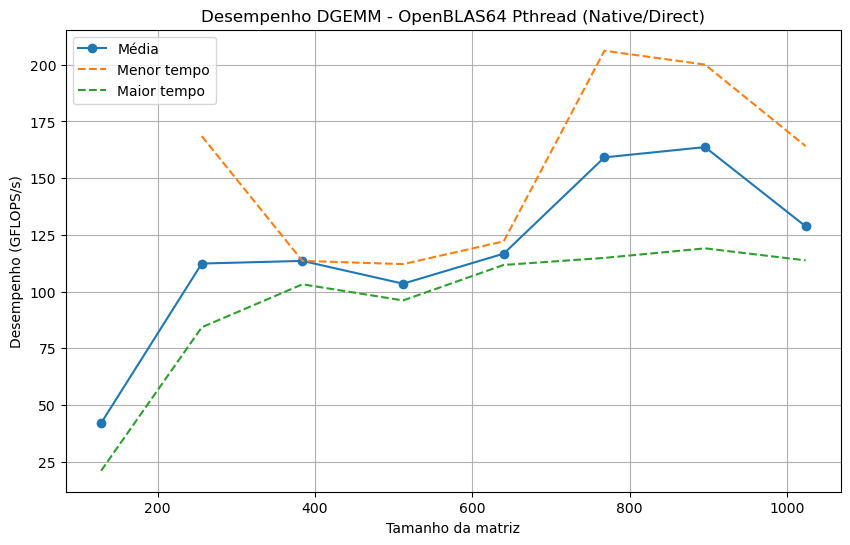

In [34]:
# OpenBLAS64 Pthread - Direct
matSize_oblas64pth_dc, desemp_oblas64pth_dc, desemp_oblas64pth_dc_min, desemp_oblas64pth_dc_max = processar_dados(
    'output_OpenBLAS64Pth.dat', '../output_multi/native/direct_compilation')

if matSize_oblas64pth_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc, label='Média', marker='o')
    plt.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc_min, '--', label='Menor tempo')
    plt.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - OpenBLAS64 Pthread (Native/Direct)')
    plt.legend()
    plt.grid(True)
    plt.show()

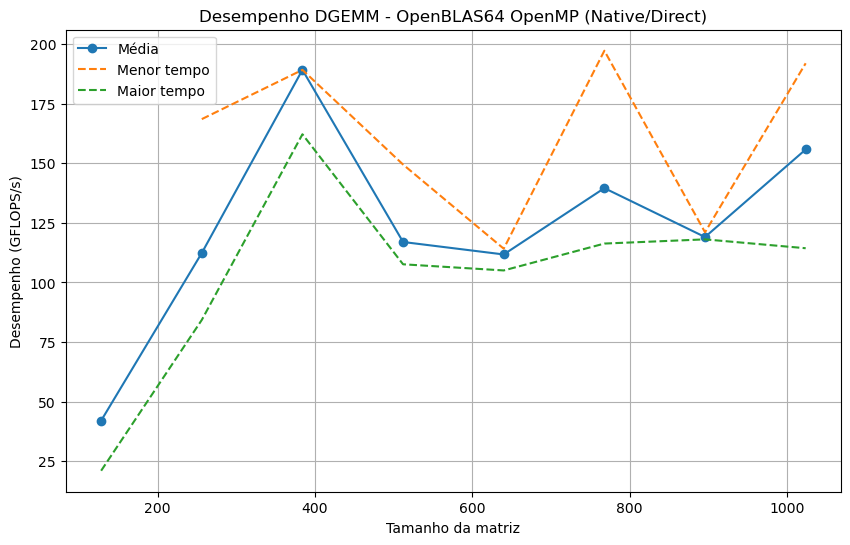

In [35]:
# OpenBLAS64 OpenMP - Direct
matSize_oblas64omp_dc, desemp_oblas64omp_dc, desemp_oblas64omp_dc_min, desemp_oblas64omp_dc_max = processar_dados(
    'output_OpenBLAS64Omp.dat', '../output_multi/native/direct_compilation')

if matSize_oblas64omp_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc, label='Média', marker='o')
    plt.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc_min, '--', label='Menor tempo')
    plt.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - OpenBLAS64 OpenMP (Native/Direct)')
    plt.legend()
    plt.grid(True)
    plt.show()

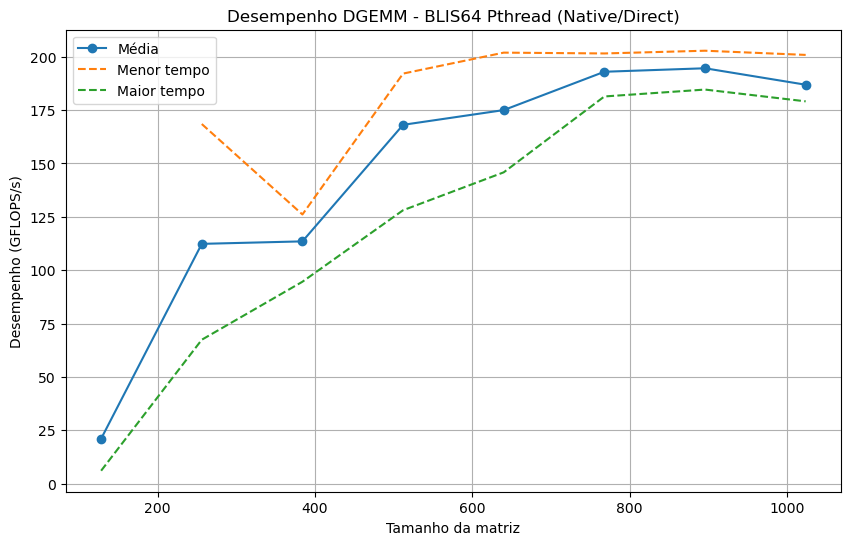

In [36]:
# BLIS64 Pthread - Direct
matSize_blis64pth_dc, desemp_blis64pth_dc, desemp_blis64pth_dc_min, desemp_blis64pth_dc_max = processar_dados(
    'output_BLIS64Pth.dat', '../output_multi/native/direct_compilation')

if matSize_blis64pth_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64pth_dc, desemp_blis64pth_dc, label='Média', marker='o')
    plt.plot(matSize_blis64pth_dc, desemp_blis64pth_dc_min, '--', label='Menor tempo')
    plt.plot(matSize_blis64pth_dc, desemp_blis64pth_dc_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - BLIS64 Pthread (Native/Direct)')
    plt.legend()
    plt.grid(True)
    plt.show()

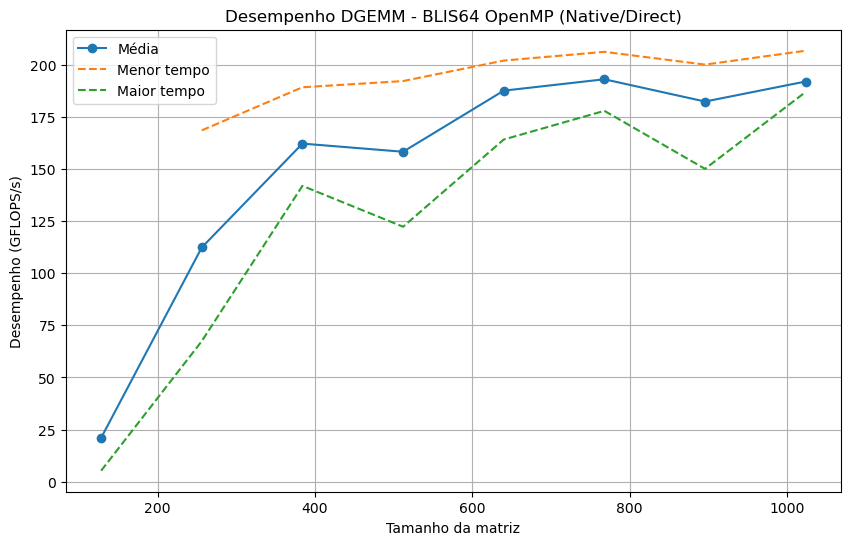

In [37]:
# BLIS64 OpenMP - Direct
matSize_blis64omp_dc, desemp_blis64omp_dc, desemp_blis64omp_dc_min, desemp_blis64omp_dc_max = processar_dados(
    'output_BLIS64Omp.dat', '../output_multi/native/direct_compilation')

if matSize_blis64omp_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64omp_dc, desemp_blis64omp_dc, label='Média', marker='o')
    plt.plot(matSize_blis64omp_dc, desemp_blis64omp_dc_min, '--', label='Menor tempo')
    plt.plot(matSize_blis64omp_dc, desemp_blis64omp_dc_max, '--', label='Maior tempo')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('Desempenho DGEMM - BLIS64 OpenMP (Native/Direct)')
    plt.legend()
    plt.grid(True)
    plt.show()

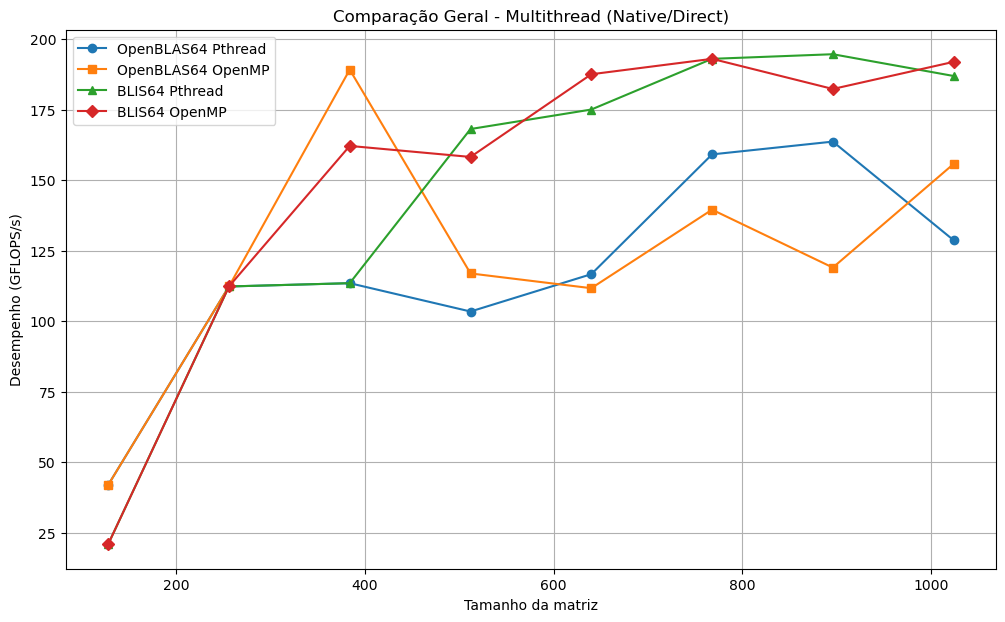

In [38]:
# Comparação Geral - Native Direct Compilation
plt.figure(figsize=(12,7))
if matSize_oblas64pth_dc is not None:
    plt.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc, '-', label='OpenBLAS64 Pthread', marker='o')
if matSize_oblas64omp_dc is not None:
    plt.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc, '-', label='OpenBLAS64 OpenMP', marker='s')
if matSize_blis64pth_dc is not None:
    plt.plot(matSize_blis64pth_dc, desemp_blis64pth_dc, '-', label='BLIS64 Pthread', marker='^')
if matSize_blis64omp_dc is not None:
    plt.plot(matSize_blis64omp_dc, desemp_blis64omp_dc, '-', label='BLIS64 OpenMP', marker='D')
plt.xlabel('Tamanho da matriz')
plt.ylabel('Desempenho (GFLOPS/s)')
plt.title('Comparação Geral - Multithread (Native/Direct)')
plt.legend()
plt.grid(True)
plt.show()

## Comparação: Alternatives vs Direct Compilation

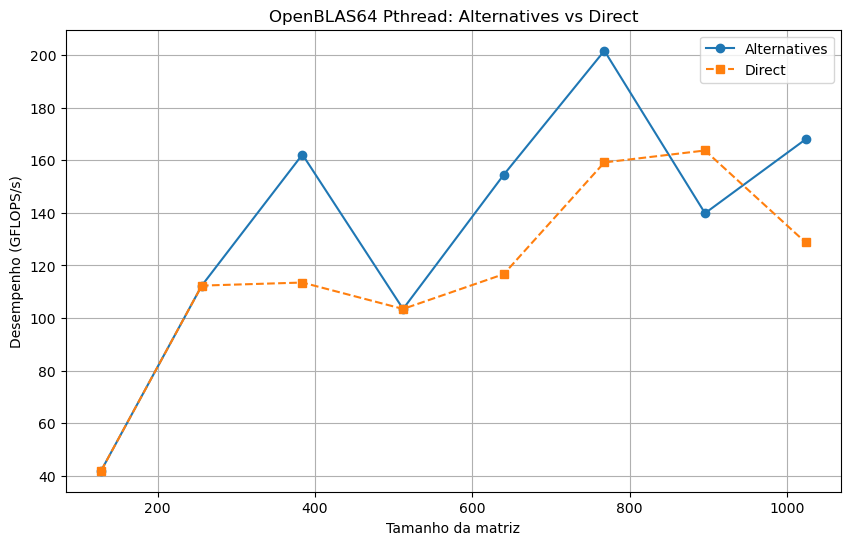

In [39]:
# OpenBLAS64 Pthread: Alternatives vs Direct
if matSize_oblas64pth is not None and matSize_oblas64pth_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64pth, desemp_oblas64pth, '-', label='Alternatives', marker='o')
    plt.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc, '--', label='Direct', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('OpenBLAS64 Pthread: Alternatives vs Direct')
    plt.legend()
    plt.grid(True)
    plt.show()

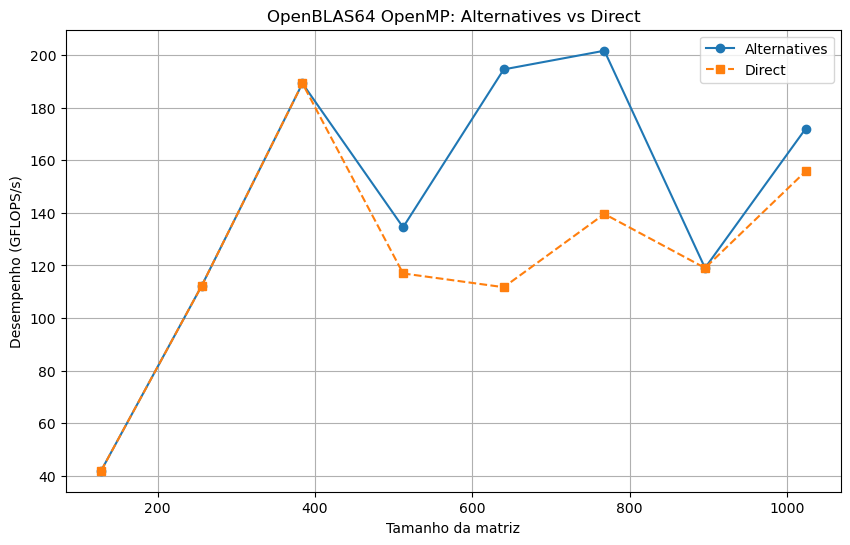

In [40]:
# OpenBLAS64 OpenMP: Alternatives vs Direct
if matSize_oblas64omp is not None and matSize_oblas64omp_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64omp, desemp_oblas64omp, '-', label='Alternatives', marker='o')
    plt.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc, '--', label='Direct', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('OpenBLAS64 OpenMP: Alternatives vs Direct')
    plt.legend()
    plt.grid(True)
    plt.show()

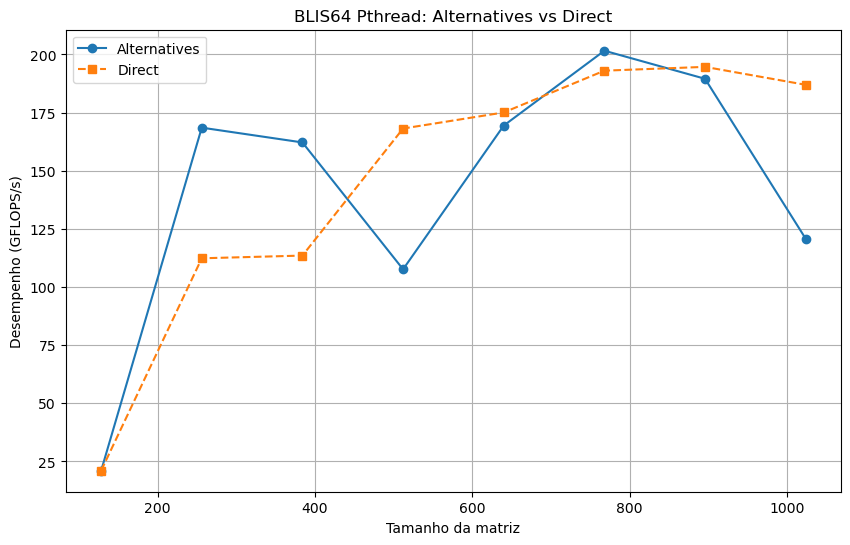

In [41]:
# BLIS64 Pthread: Alternatives vs Direct
if matSize_blis64pth is not None and matSize_blis64pth_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64pth, desemp_blis64pth, '-', label='Alternatives', marker='o')
    plt.plot(matSize_blis64pth_dc, desemp_blis64pth_dc, '--', label='Direct', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('BLIS64 Pthread: Alternatives vs Direct')
    plt.legend()
    plt.grid(True)
    plt.show()

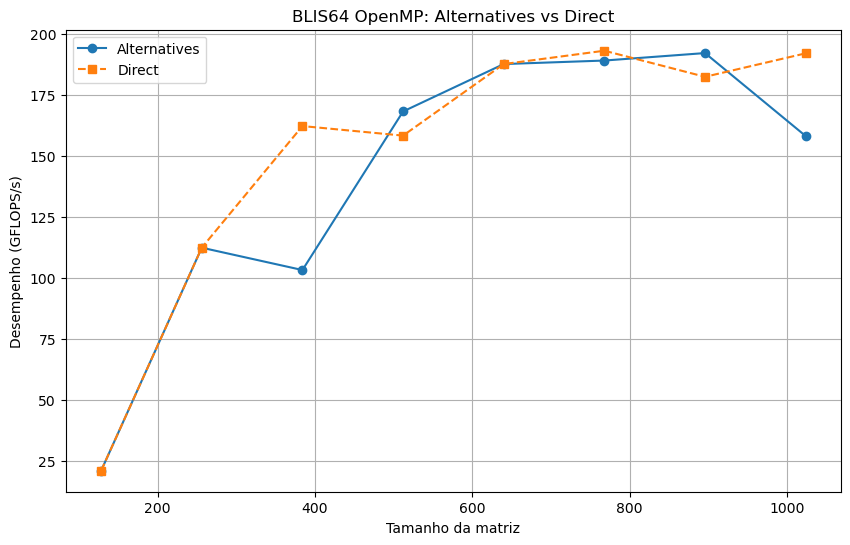

In [42]:
# BLIS64 OpenMP: Alternatives vs Direct
if matSize_blis64omp is not None and matSize_blis64omp_dc is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64omp, desemp_blis64omp, '-', label='Alternatives', marker='o')
    plt.plot(matSize_blis64omp_dc, desemp_blis64omp_dc, '--', label='Direct', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('BLIS64 OpenMP: Alternatives vs Direct')
    plt.legend()
    plt.grid(True)
    plt.show()

## Comparação: Pthread vs OpenMP

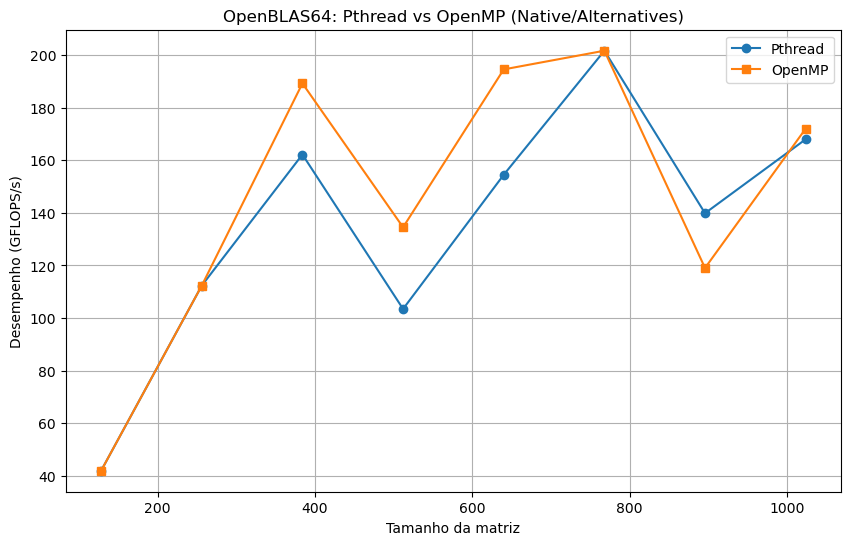

In [43]:
# OpenBLAS64: Pthread vs OpenMP (Native/Alternatives)
if matSize_oblas64pth is not None and matSize_oblas64omp is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_oblas64pth, desemp_oblas64pth, '-', label='Pthread', marker='o')
    plt.plot(matSize_oblas64omp, desemp_oblas64omp, '-', label='OpenMP', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('OpenBLAS64: Pthread vs OpenMP (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

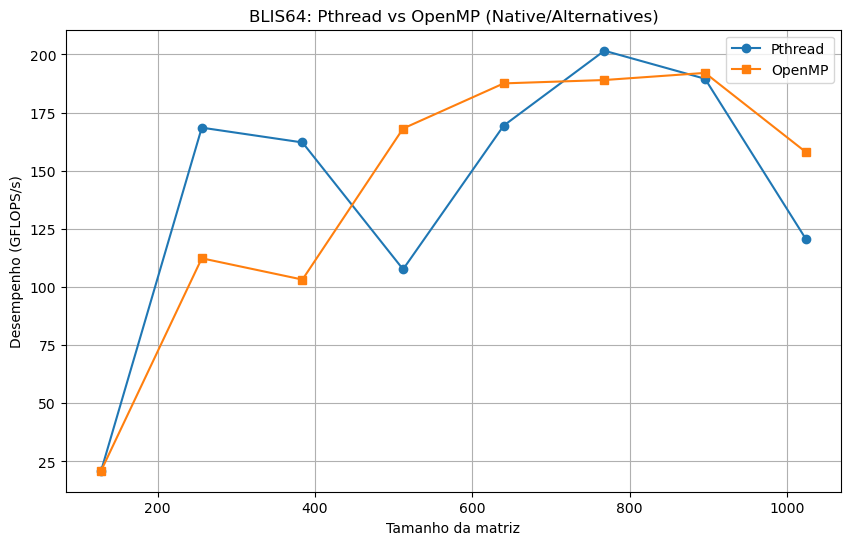

In [44]:
# BLIS64: Pthread vs OpenMP (Native/Alternatives)
if matSize_blis64pth is not None and matSize_blis64omp is not None:
    plt.figure(figsize=(10,6))
    plt.plot(matSize_blis64pth, desemp_blis64pth, '-', label='Pthread', marker='o')
    plt.plot(matSize_blis64omp, desemp_blis64omp, '-', label='OpenMP', marker='s')
    plt.xlabel('Tamanho da matriz')
    plt.ylabel('Desempenho (GFLOPS/s)')
    plt.title('BLIS64: Pthread vs OpenMP (Native/Alternatives)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Comparação Final: Todas as configurações

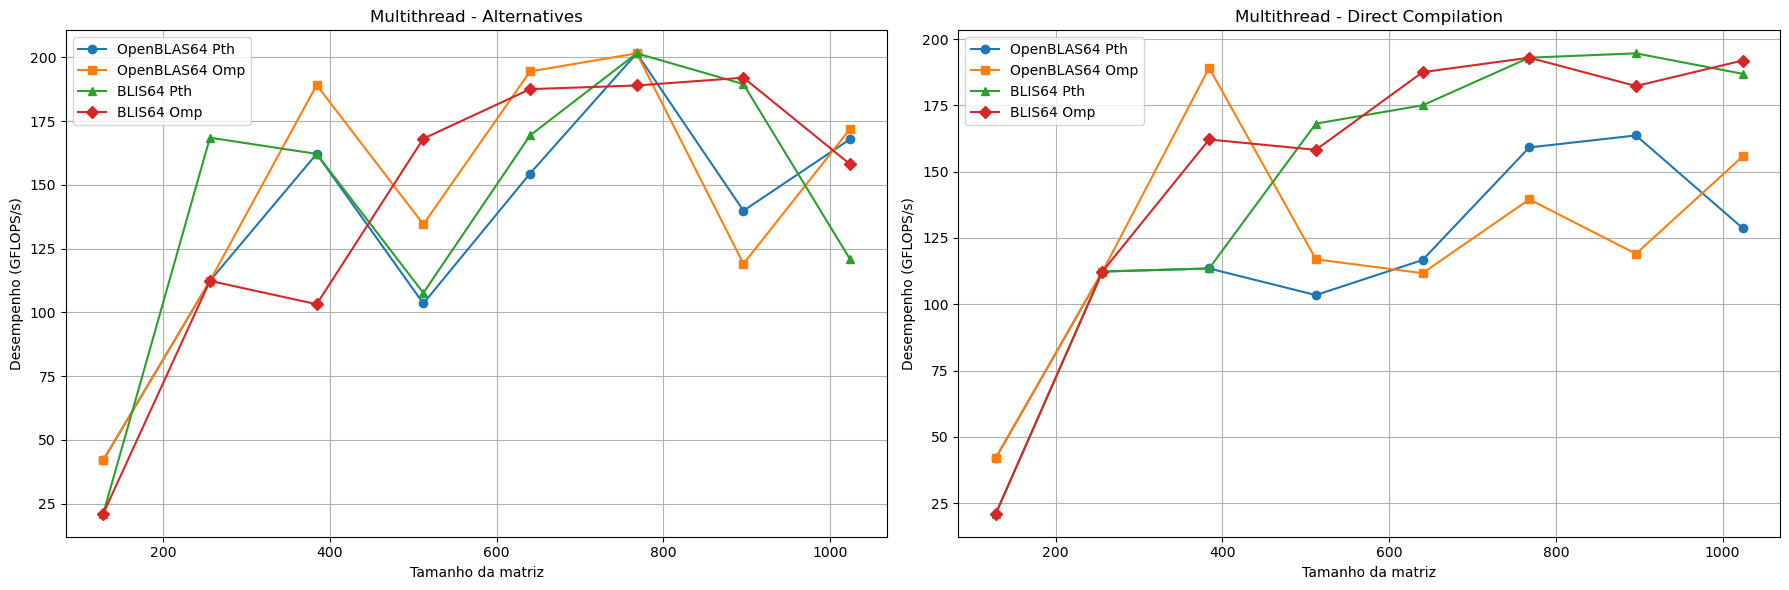

In [45]:
# Comparação Final: Alternatives vs Direct (lado a lado)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Alternatives
if matSize_oblas64pth is not None:
    ax1.plot(matSize_oblas64pth, desemp_oblas64pth, '-', label='OpenBLAS64 Pth', marker='o')
if matSize_oblas64omp is not None:
    ax1.plot(matSize_oblas64omp, desemp_oblas64omp, '-', label='OpenBLAS64 Omp', marker='s')
if matSize_blis64pth is not None:
    ax1.plot(matSize_blis64pth, desemp_blis64pth, '-', label='BLIS64 Pth', marker='^')
if matSize_blis64omp is not None:
    ax1.plot(matSize_blis64omp, desemp_blis64omp, '-', label='BLIS64 Omp', marker='D')
ax1.set_xlabel('Tamanho da matriz')
ax1.set_ylabel('Desempenho (GFLOPS/s)')
ax1.set_title('Multithread - Alternatives')
ax1.legend()
ax1.grid(True)

# Direct Compilation
if matSize_oblas64pth_dc is not None:
    ax2.plot(matSize_oblas64pth_dc, desemp_oblas64pth_dc, '-', label='OpenBLAS64 Pth', marker='o')
if matSize_oblas64omp_dc is not None:
    ax2.plot(matSize_oblas64omp_dc, desemp_oblas64omp_dc, '-', label='OpenBLAS64 Omp', marker='s')
if matSize_blis64pth_dc is not None:
    ax2.plot(matSize_blis64pth_dc, desemp_blis64pth_dc, '-', label='BLIS64 Pth', marker='^')
if matSize_blis64omp_dc is not None:
    ax2.plot(matSize_blis64omp_dc, desemp_blis64omp_dc, '-', label='BLIS64 Omp', marker='D')
ax2.set_xlabel('Tamanho da matriz')
ax2.set_ylabel('Desempenho (GFLOPS/s)')
ax2.set_title('Multithread - Direct Compilation')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Análise Estatística

In [46]:
# Calcular estatísticas de desempenho
def calcular_stats(matSize, desempenho, nome):
    if matSize is not None and desempenho is not None:
        print(f"\n{nome}:")
        print(f"  Desempenho médio: {desempenho.mean():.2f} GFLOPS/s")
        print(f"  Desempenho máximo: {desempenho.max():.2f} GFLOPS/s")
        print(f"  Desempenho mínimo: {desempenho.min():.2f} GFLOPS/s")
        print(f"  Desvio padrão: {desempenho.std():.2f} GFLOPS/s")

print("="*60)
print("ESTATÍSTICAS DE DESEMPENHO - NATIVE ALTERNATIVES")
print("="*60)
calcular_stats(matSize_oblas64pth, desemp_oblas64pth, "OpenBLAS64 Pthread")
calcular_stats(matSize_oblas64omp, desemp_oblas64omp, "OpenBLAS64 OpenMP")
calcular_stats(matSize_blis64pth, desemp_blis64pth, "BLIS64 Pthread")
calcular_stats(matSize_blis64omp, desemp_blis64omp, "BLIS64 OpenMP")

print("\n" + "="*60)
print("ESTATÍSTICAS DE DESEMPENHO - NATIVE DIRECT")
print("="*60)
calcular_stats(matSize_oblas64pth_dc, desemp_oblas64pth_dc, "OpenBLAS64 Pthread")
calcular_stats(matSize_oblas64omp_dc, desemp_oblas64omp_dc, "OpenBLAS64 OpenMP")
calcular_stats(matSize_blis64pth_dc, desemp_blis64pth_dc, "BLIS64 Pthread")
calcular_stats(matSize_blis64omp_dc, desemp_blis64omp_dc, "BLIS64 OpenMP")

ESTATÍSTICAS DE DESEMPENHO - NATIVE ALTERNATIVES

OpenBLAS64 Pthread:
  Desempenho médio: 135.47 GFLOPS/s
  Desempenho máximo: 201.58 GFLOPS/s
  Desempenho mínimo: 42.00 GFLOPS/s
  Desvio padrão: 49.01 GFLOPS/s

OpenBLAS64 OpenMP:
  Desempenho médio: 145.63 GFLOPS/s
  Desempenho máximo: 201.58 GFLOPS/s
  Desempenho mínimo: 42.00 GFLOPS/s
  Desvio padrão: 54.49 GFLOPS/s

BLIS64 Pthread:
  Desempenho médio: 142.56 GFLOPS/s
  Desempenho máximo: 201.58 GFLOPS/s
  Desempenho mínimo: 21.00 GFLOPS/s
  Desvio padrão: 58.48 GFLOPS/s

BLIS64 OpenMP:
  Desempenho médio: 141.41 GFLOPS/s
  Desempenho máximo: 192.04 GFLOPS/s
  Desempenho mínimo: 21.00 GFLOPS/s
  Desvio padrão: 59.46 GFLOPS/s

ESTATÍSTICAS DE DESEMPENHO - NATIVE DIRECT

OpenBLAS64 Pthread:
  Desempenho médio: 117.44 GFLOPS/s
  Desempenho máximo: 163.67 GFLOPS/s
  Desempenho mínimo: 42.00 GFLOPS/s
  Desvio padrão: 37.67 GFLOPS/s

OpenBLAS64 OpenMP:
  Desempenho médio: 123.32 GFLOPS/s
  Desempenho máximo: 189.17 GFLOPS/s
  Desempenho m